# Задание 5.
Реализовать для нахождения максимального по модулю собственного числа и соответствующего собственного вектора матрицы степенной метод и метод скалярных произведений.
- Вычисления проводить до достижения точности ε.
- Варьируя ε, скажем, от 10e−2 до 10e−5, изучить зависимость количества итераций от ε.
- Сравнить количество итераций в методах (при каждом фиксированном ε).
- Сравнить полученные значения (с.ч. и с.в.) с найденными встроенными функциями.

# Imports

In [9]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

# Solution

In [16]:
MaxEigenValueAndVector = namedtuple('MaxEigenValueAndVector', ['eigen_value', 'eigen_vector', 'iterations_count'])

def calculate_error(A: np.ndarray, Y: np.ndarray, lambda_k: float) -> float:
    """Calculate the a posteriori estimate error."""
    return np.linalg.norm(A.dot(Y) - lambda_k * Y) / np.linalg.norm(Y)

def find_eigenvalue_and_vector(A: np.ndarray, epsilon: float, max_iterations_count: int, method: str) -> MaxEigenValueAndVector:
    """General function to find eigenvalue and eigenvector using specified method."""
    if A.shape[0] != A.shape[1]:
        raise ValueError('Input matrix A must be square.')

    Y, iterations_count = np.ones(A.shape[0]), 0

    while True:
        previous_Y = Y
        Y = A.dot(previous_Y)
        lambda_k = (previous_Y.dot(Y) / previous_Y.dot(previous_Y)) if method == 'scalar' else (Y / previous_Y)[0]
        iterations_count += 1

        if calculate_error(A, Y, lambda_k) < epsilon:
            break

        if iterations_count > max_iterations_count:
            raise ValueError(f'Result not found after {max_iterations_count} iterations.')

    return MaxEigenValueAndVector(lambda_k, Y, iterations_count)

def find_using_power_method(A: np.ndarray, epsilon: float, max_iterations_count: int) -> MaxEigenValueAndVector:
    return find_eigenvalue_and_vector(A, epsilon, max_iterations_count, method='power')

def find_using_scalar_product_method(A: np.ndarray, epsilon: float, max_iterations_count: int) -> MaxEigenValueAndVector:
    if not np.allclose(A, A.T):
        raise ValueError('Matrix A is not symmetric.')

    return find_eigenvalue_and_vector(A, epsilon, max_iterations_count, method='scalar')

# Tests

In [17]:
def test_find_using_power_method_random_matrices():
    num_matrices = 10
    matrix_size = 5
    epsilon = 0.001
    max_iterations = 1000

    for _ in range(num_matrices):
        A = np.random.rand(matrix_size, matrix_size)
        true_eigenvalues = np.linalg.eigvals(A)
        largest_eigenvalue = np.max(np.abs(true_eigenvalues))

        calculated_eigenvalue, _, _ = find_using_power_method(A, epsilon, max_iterations)
        assert np.isclose(calculated_eigenvalue, largest_eigenvalue, atol=epsilon), \
            "Calculated eigenvalue should be close to the true largest eigenvalue"

test_find_using_power_method_random_matrices()

In [18]:
def test_find_using_scalar_product_method_random_matrices():
    num_matrices = 10
    matrix_size = 5
    epsilon = 0.001
    max_iterations = 1000

    for _ in range(num_matrices):
        A = np.random.rand(matrix_size, matrix_size)
        A = A + A.T  # Making A symmetric
        true_eigenvalues = np.linalg.eigvals(A)
        largest_eigenvalue = np.max(np.abs(true_eigenvalues))

        calculated_eigenvalue, _, _ = find_using_scalar_product_method(A, epsilon, max_iterations)
        assert np.isclose(calculated_eigenvalue, largest_eigenvalue, atol=epsilon), \
            "Calculated eigenvalue should be close to the true largest eigenvalue"

test_find_using_scalar_product_method_random_matrices()

# Experiments

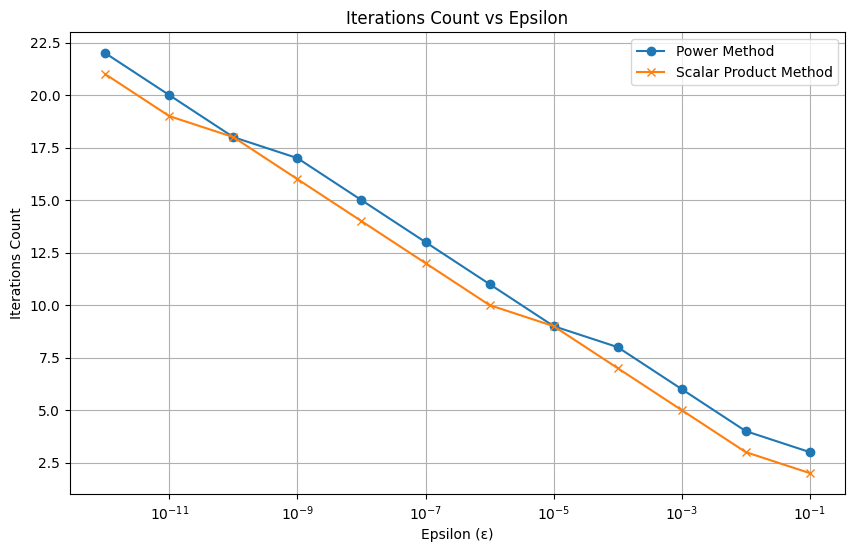

In [19]:
# Experiment 1
epsilons = np.logspace(-1, -12, num=12)  # ε varying from 10^-2 to 10^-5
max_iterations = 1000
matrix_size = 5  # Size of the random matrix

# Lists to store iteration counts for each method
iterations_power_method = []
iterations_scalar_product_method = []

# Generating a random matrix
np.random.seed(0)  # For reproducibility
A = np.random.rand(matrix_size, matrix_size)
A = A + A.T

for epsilon in epsilons:
    result_power = find_using_power_method(A, epsilon, max_iterations)
    result_scalar = find_using_scalar_product_method(A, epsilon, max_iterations)

    iterations_power_method.append(result_power.iterations_count)
    iterations_scalar_product_method.append(result_scalar.iterations_count)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epsilons, iterations_power_method, label='Power Method', marker='o')
plt.plot(epsilons, iterations_scalar_product_method, label='Scalar Product Method', marker='x')
plt.xlabel('Epsilon (ε)')
plt.ylabel('Iterations Count')
plt.title('Iterations Count vs Epsilon')
plt.xscale('log')
plt.legend()
plt.grid(True)
plt.show()

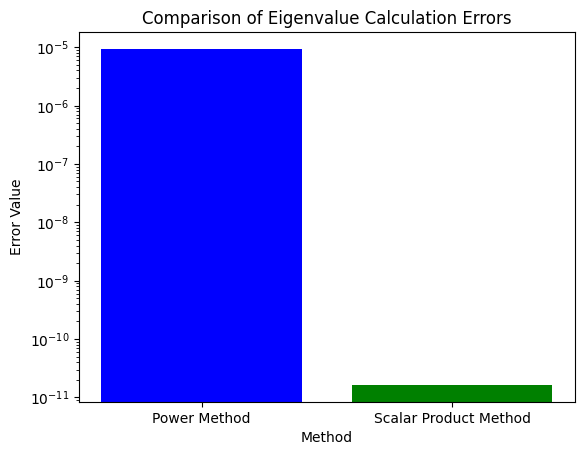

In [20]:
epsilon = 1e-5  # Using a small epsilon for accuracy
result_power = find_using_power_method(A, epsilon, max_iterations)
result_scalar = find_using_scalar_product_method(A, epsilon, max_iterations)

# Built-in NumPy method to find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
max_eigenvalue_index = np.argmax(np.abs(eigenvalues))
max_eigenvalue = eigenvalues[max_eigenvalue_index]
max_eigenvector = eigenvectors[:, max_eigenvalue_index]

# Comparing results
error_power_eigenvalue = np.abs(max_eigenvalue - result_power.eigen_value)
error_scalar_eigenvalue = np.abs(max_eigenvalue - result_scalar.eigen_value)

methods = ['Power Method', 'Scalar Product Method']

# Corresponding errors
errors = [error_power_eigenvalue, error_scalar_eigenvalue]

# Creating the bar chart
plt.bar(methods, errors, color=['blue', 'green'])

# Adding titles and labels
plt.title('Comparison of Eigenvalue Calculation Errors')
plt.ylabel('Error Value')
plt.xlabel('Method')

plt.yscale('log')

# Show the plot
plt.show()